<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Download the webpage at the url


In [4]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [5]:
#your code goes here
soup = BeautifulSoup(data,'html5lib')

Scrape the `Language name` and `annual average salary`.


In [7]:
#your code goes here
language_list = []
table = soup.find('table')
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language = cols[1].getText()
    salary = cols[3].getText()
    language_list.append([language,salary])
print(language_list)

[['Language', 'Average Annual Salary'], ['Python', '$114,383'], ['Java', '$101,013'], ['R', '$92,037'], ['Javascript', '$110,981'], ['Swift', '$130,801'], ['C++', '$113,865'], ['C#', '$88,726'], ['PHP', '$84,727'], ['SQL', '$84,793'], ['Go', '$94,082']]


In [15]:
df = pd.DataFrame(language_list[1:],columns=['Language name','annual average salary'])
#df.drop([0],inplace=True)
df['annual average salary'] = df['annual average salary'].replace('[\$]','',regex=True)
df['annual average salary'] = df['annual average salary'].replace(',','',regex=True)
df

,Language name,annual average salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


In [16]:
df['annual average salary'] = df['annual average salary'].astype('float')
df.sort_values('annual average salary',inplace=True,ascending=False)
df

,Language name,annual average salary
4,Swift,130801.0
0,Python,114383.0
5,C++,113865.0
3,Javascript,110981.0
1,Java,101013.0
9,Go,94082.0
2,R,92037.0
6,C#,88726.0
8,SQL,84793.0
7,PHP,84727.0


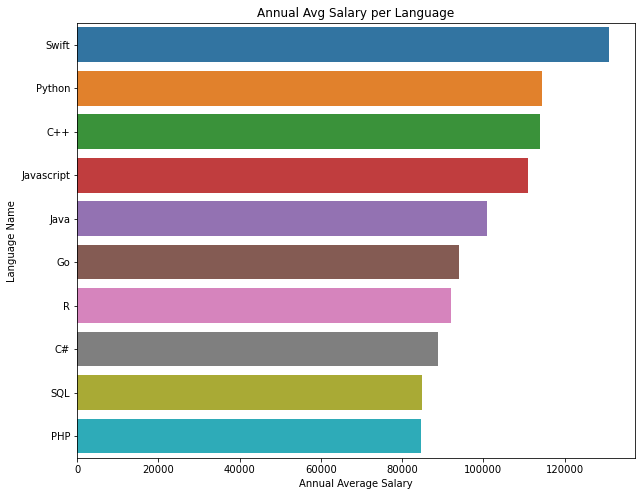

In [17]:
plt.figure(figsize=[10,8])
sns.barplot(data = df , y= 'Language name',x='annual average salary')
plt.title("Annual Avg Salary per Language")
plt.xlabel("Annual Average Salary")
plt.ylabel("Language Name")
plt.show()

Save the scrapped data into a file named *popular-languages.csv*


In [18]:
# your code goes here
df.to_csv('popular-languages.csv',index=False)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
